# 1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling

•	Discuss the scenarios where each scaling technique is preferred and why.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('adult_with_headers.csv')
df.shape

(32561, 15)

In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df_num = df[['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']]
df_num.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


In [7]:
df_cat = df[['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country', 'income']]
df_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Visualizations

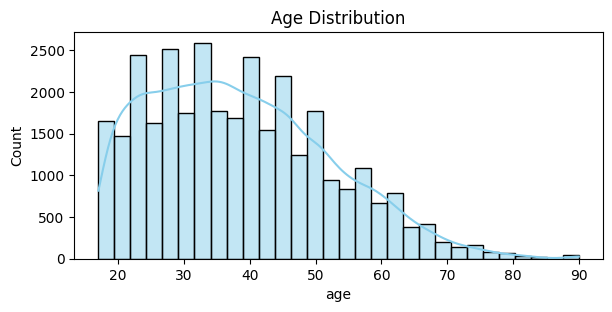

In [8]:
# Constructing box plot 

import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize = (15,10))
plt.subplot(3,2,1)
sns.histplot(df['age'], bins = 30, kde = True, color = 'skyblue')
plt.title('Age Distribution')
plt.show()

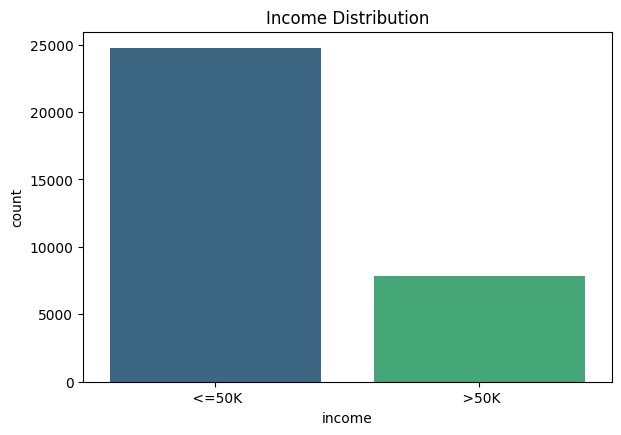

In [9]:
# Count plot for Income Distribution

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'income', palette = 'viridis')
plt.title('Income Distribution')
plt.show()

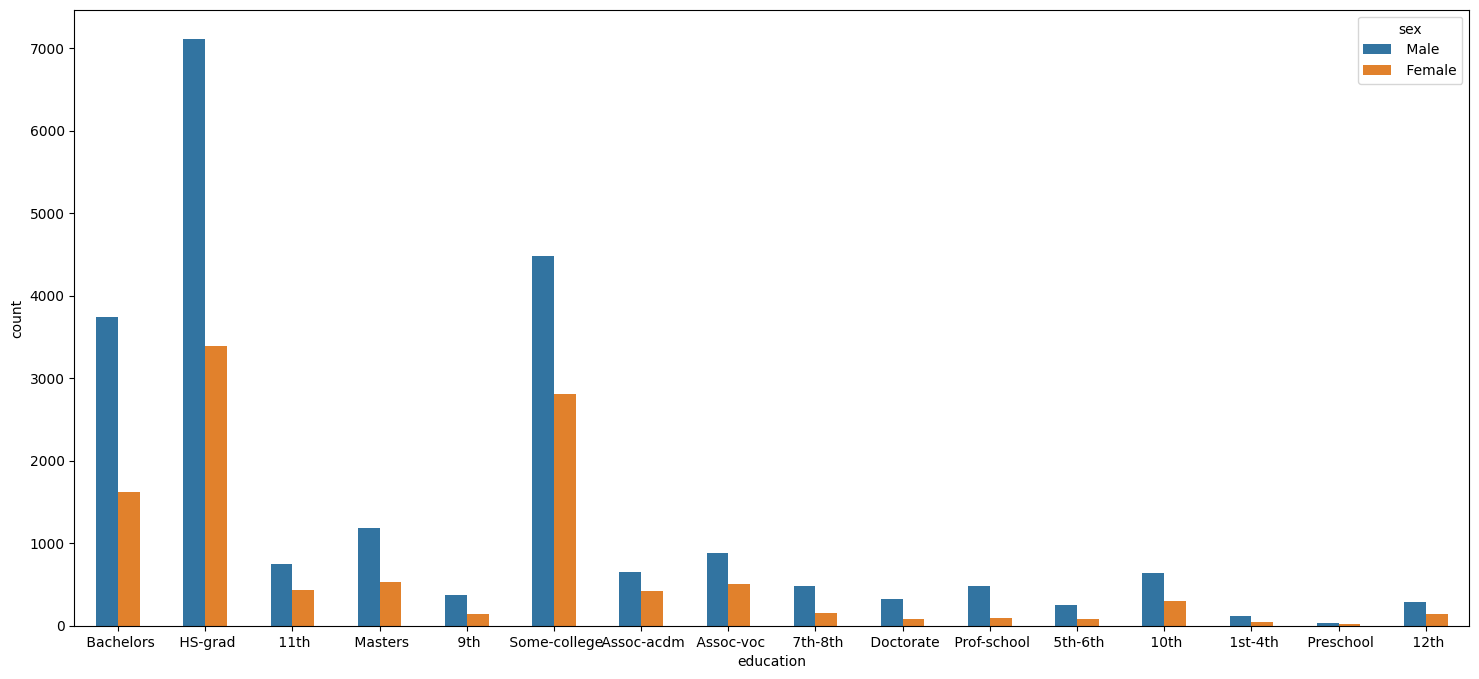

In [10]:
plt.figure(figsize = (18,8))
sns.countplot(data = df, x = 'education', hue = 'sex', orient = 'x', width = 0.5)
plt.show()

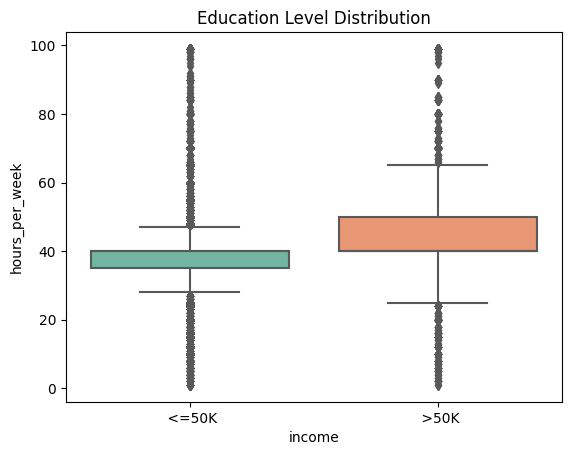

In [11]:
# box plot

sns.boxplot(data = df, x = 'income', y = 'hours_per_week', palette = 'Set2')
plt.title('Education Level Distribution')
plt.show()

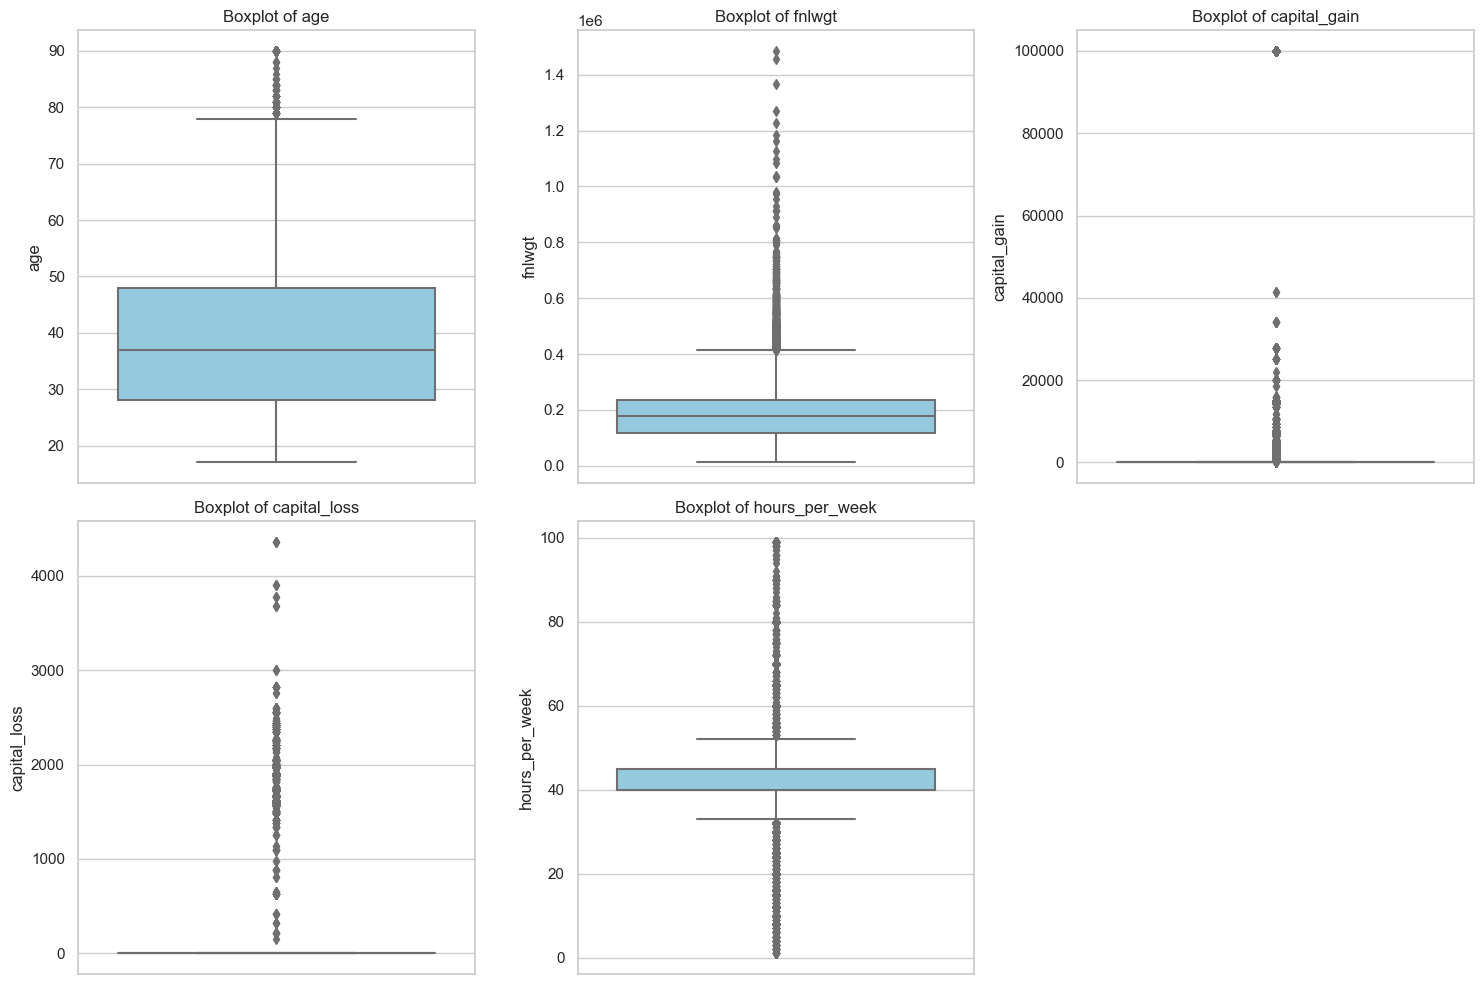

In [12]:
# constructing box plot for all numerical columns

plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')

for i, col in enumerate(df_num, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data = df, y = col, color = 'skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

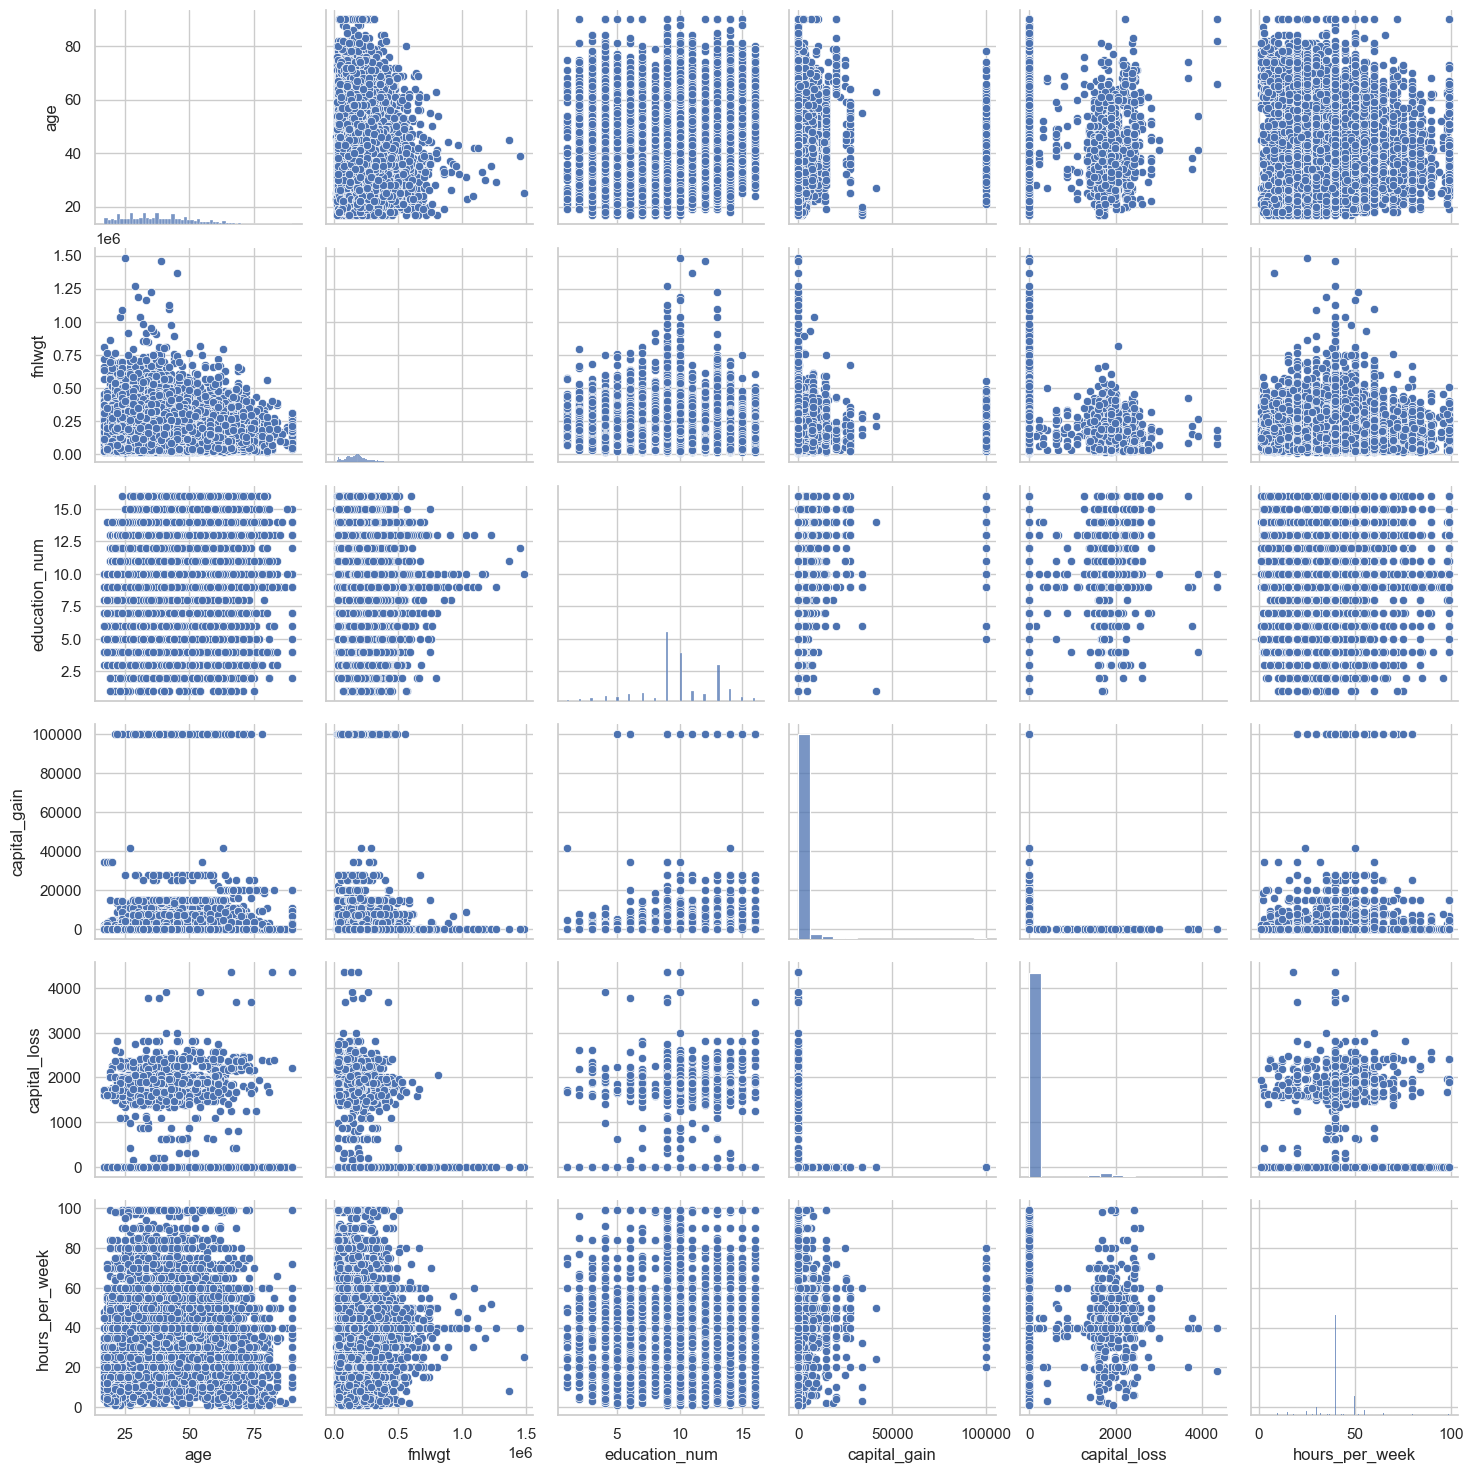

In [13]:
#  pair plot 

sns.pairplot(df.select_dtypes(include = ['int64']))
plt.show()

In [14]:
# Standardization

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

for i in df_num.columns:
    df_num[i] = SS.fit_transform(df_num[[i]])
df_num.head()

C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\1288518771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = SS.fit_transform(df_num[[i]])
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\1288518771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = SS.fit_transform(df_num[[i]])
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\1288518771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,-0.145920,-0.21666,-0.035429


In [15]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

for i in df_num.columns:
    df_num[i] = MM.fit_transform(df_num[[i]])
df_num.head()

C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\2575893521.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = MM.fit_transform(df_num[[i]])
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\2575893521.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = MM.fit_transform(df_num[[i]])
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\2575893521.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.02174,0.0,0.397959
1,0.452055,0.048238,0.00000,0.0,0.122449
2,0.287671,0.138113,0.00000,0.0,0.397959
3,0.493151,0.151068,0.00000,0.0,0.397959
4,0.150685,0.221488,0.00000,0.0,0.397959


# 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.

•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [16]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [17]:
for i in df_cat.columns:
    df_cat[i] = LE.fit_transform(df_cat[[i]])
df_cat.head()

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\29380342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = LE.fit_transform(df_cat[[i]])
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mulag\AppData\Local\Temp\ipykernel_11752\29380342.py:2: 

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [18]:
# one-hot encoding

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

In [19]:
df_ohe = df_cat[['race', 'sex', 'income']]

In [20]:
dummy = OHE.fit_transform(df_ohe).toarray()
dummy

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
df_cat_full = pd.DataFrame(dummy)

In [22]:
my_list = ['Amer-Indian_Eskimo', 'Asian-Pac_Islander', 'Black', 'Other', 'White', 'Female', 'Male', '<=50K', '>50K']

In [23]:
df_cat_full.columns = my_list
df_cat_full.head()

,Amer-Indian_Eskimo,Asian-Pac_Islander,Black,Other,White,Female,Male,<=50K,>50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

a. One-Hot Encoding : One-Hot Encoding transforms each category of a feature into a separate binary column (0 or 1), creating a column for each unique category.

- Pros:
1. No Ordinal Assumptions: Ideal for features where categories do not have an inherent order (e.g., colors, countries). It avoids imposing any ordinal relationships among categories.
2. Compatibility with Algorithms: Many machine learning algorithms (like linear regression, logistic regression, and neural networks) perform better with one-hot-encoded data as it avoids assigning arbitrary numerical values to categories.
- Cons:
1. High Dimensionality: One-hot encoding can result in a significant increase in dimensionality, especially for features with many unique categories, which may lead to the curse of dimensionality.
2. Sparse Matrix: Many algorithms struggle with high-dimensional sparse matrices, leading to increased computation time and memory usage.
3. Overfitting Risk: The high number of features in low-data scenarios may lead to overfitting, as the model could learn noise instead of patterns.


b. Label Encoding
Label Encoding assigns a unique integer to each category. For instance, in a "color" feature, "Red" might be 1, "Green" 2, and "Blue" 3.

- Pros:
1. Simplicity: Label encoding is straightforward, as it doesn’t increase the dataset’s dimensionality, keeping it compact.
2. Efficiency: Since only one column is modified, label encoding is computationally faster and requires less memory, making it suitable for models that work well with ordinal data or when categories have inherent order.
- Cons:
1. Imposed Ordinality: Label encoding imposes an ordinal relationship among categories (e.g., 1 < 2 < 3), which can mislead some models by introducing unintended bias in cases where categories are nominal.
2 Potential Bias in Distance-Based Models: Algorithms like KNN and SVM might interpret the numerical distances between categories as meaningful, potentially reducing model accuracy if there’s no ordinal relationship in the data.

# 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
    
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [24]:
# creating age group features
df['age_group'] = pd.cut(df['age'], bins = [0, 30, 55, 100], labels = ['Young','Middle_aged','Senior'])
df['age_group']

0        Middle_aged
1        Middle_aged
2        Middle_aged
3        Middle_aged
4              Young
            ...     
32556          Young
32557    Middle_aged
32558         Senior
32559          Young
32560    Middle_aged
Name: age_group, Length: 32561, dtype: category
Categories (3, object): ['Young' < 'Middle_aged' < 'Senior']

In [25]:
# creating work hours features
df['work_hours_category'] = pd.cut(df['hours_per_week'], bins = [0, 30, 55, 100], labels = ['Part_time','Full_time','Overtime'])
df['work_hours_category']

0        Full_time
1        Part_time
2        Full_time
3        Full_time
4        Full_time
           ...    
32556    Full_time
32557    Full_time
32558    Full_time
32559    Part_time
32560    Full_time
Name: work_hours_category, Length: 32561, dtype: category
Categories (3, object): ['Part_time' < 'Full_time' < 'Overtime']

In [26]:
# Log Transformation

df['capital_gain_log'] = np.log1p(df['capital_gain'])
df['capital_gain_log']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain_log, Length: 32561, dtype: float64

After this transformation, capital_gain_log will have a reduced skewness, improving the model’s ability to generalize.

# Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
    
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [27]:
# Isolation Forest

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination = 0.05, random_state = 42)

In [28]:
outliers = iso_forest.fit_predict(df_num)

In [29]:
df['outlier'] = outliers
df_inliers = df[df['outlier'] == 1].drop(columns = ['outlier'])
df_outliers = df[df['outlier'] == -1]

In [30]:
df_inliers.shape

(30933, 18)

In [31]:
df_outliers.shape

(1628, 19)

In [132]:
# pip install ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13201 sha256=c808776e48e29705fc523186e4d683c20684b6117f5c6aec23d4dbeb8db3fae3
  Stored in directory: c:\users\mulag\appdata\local\pip\cache\wheels\7e\45\08\bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
Note: you may need to restart the kernel to use updated packages.


In [145]:
# pip install pandas==1.5.3

Note: you may need to restart the kernel to use updated packages.


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\s

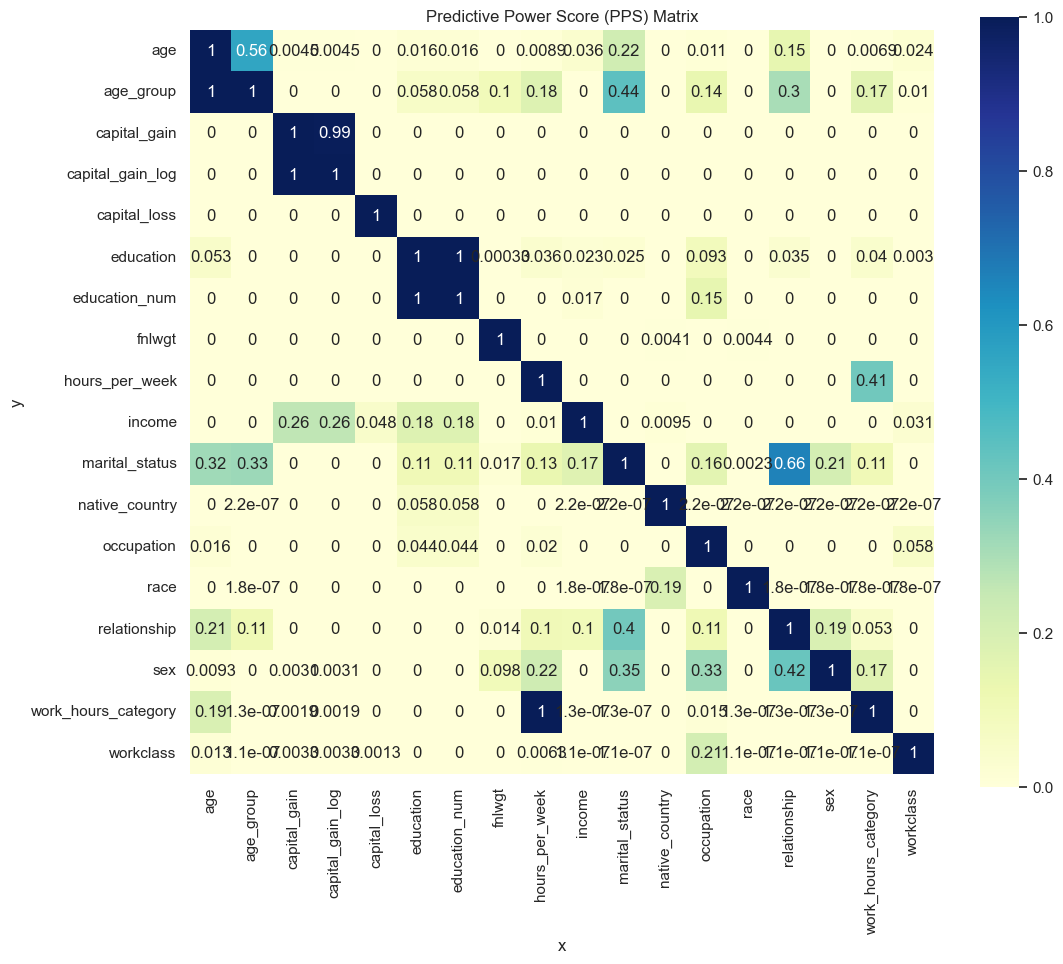

In [32]:
import pandas as pd
import ppscore as pps

# Calculate PPS matrix
pps_matrix = pps.matrix(df_inliers)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plotting the PPS matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix, annot=True, cmap="YlGnBu", square=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

Observations:
- Linear vs. Non-Linear: The correlation matrix is limited to linear associations, while PPS can highlight non-linear dependencies, which may reveal different feature relationships.
    
- Target Variable: PPS can help identify which features have high predictive power for the target (income), even if they show low correlation, offering more insight for selecting features that may improve model performance.